In [1]:
from data import loadData, preprocess, postprocess
from model import fft, lstm
from evaluate import evaluateModel, evaluateProfit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm
import matplotlib.patches as patches
from scipy.sparse import *

In [2]:
stock_name = "^GSPC"
date_predict_start = '2020-01-01'
window_length = 250
slide_range = 20
total_windows = 10
slide = 10
pv_range = 7
profit_percentage = 0.08
loss_percentage = 0.08

n_harm_lower_limit = 1
n_harm_upper_limit = 50
fit_method = 'rmse'

x_length = 10
y_length = 10


In [3]:
dataloader = loadData.LoadData(total_windows, window_length)
train_data, test_data, train_data_index, test_data_index, all_data =\
    dataloader.load_and_split_data(stock_name, date_predict_start, window_length, slide_range, total_windows)
all_data_index = all_data.index


In [4]:
preprocesser = preprocess.Preprocess()
x_train, y_train, scaler =\
    preprocesser.preprocess_train_data(train_data, x_length, y_length)
x_test, y_test, scaler =\
    preprocesser.preprocess_test_data(train_data, test_data, x_length, y_length, slide)


In [5]:
# model_ = fft.Fft()
# mixed_train_harm, mixed_test_harm, harmonics_train = model_.fft(train_data, window_length, n_harm_lower_limit, n_harm_upper_limit)


In [6]:
model = lstm.Lstm()
lstm_processed_signal = model.lstm(x_train, y_train, x_test, y_test, train_data, test_data, y_length)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/25
6/6 [==============================] - 9s 407ms/step - loss: 0.0529 - val_loss: 0.2304
Epoch 2/25
6/6 [==============================] - 0s 79ms/step - loss: 0.0315 - val_loss: 0.1133
Epoch 3/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0289 - val_loss: 0.1673
Epoch 4/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0267 - val_loss: 0.1386
Epoch 5/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0264 - val_loss: 0.1713
Epoch 6/25
6/6 [==============================] - 0s 73ms/step - loss: 0.0264 - val_loss: 0.1526
Epoch 7/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0256 - val_loss: 0.1563
Epoch 7: early stopping


 10%|█         | 1/10 [00:11<01:47, 11.89s/it]

Epoch 1/25
6/6 [==============================] - 9s 399ms/step - loss: 0.1205 - val_loss: 0.2470
Epoch 2/25
6/6 [==============================] - 0s 66ms/step - loss: 0.0692 - val_loss: 0.2650
Epoch 3/25
6/6 [==============================] - 0s 67ms/step - loss: 0.0633 - val_loss: 0.2454
Epoch 4/25
6/6 [==============================] - 0s 64ms/step - loss: 0.0537 - val_loss: 0.2015
Epoch 5/25
6/6 [==============================] - 0s 60ms/step - loss: 0.0503 - val_loss: 0.2022
Epoch 6/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0475 - val_loss: 0.1658
Epoch 7/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0456 - val_loss: 0.1687
Epoch 8/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0454 - val_loss: 0.1578
Epoch 9/25
6/6 [==============================] - 0s 60ms/step - loss: 0.0429 - val_loss: 0.1817
Epoch 10/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0420 - val_loss: 0.1897
Epoch 11/25
6/6 [===========

 20%|██        | 2/10 [00:25<01:43, 12.91s/it]

Epoch 1/25
6/6 [==============================] - 8s 361ms/step - loss: 0.1330 - val_loss: 0.2793
Epoch 2/25
6/6 [==============================] - 0s 66ms/step - loss: 0.0668 - val_loss: 0.2578
Epoch 3/25
6/6 [==============================] - 0s 66ms/step - loss: 0.0549 - val_loss: 0.1962
Epoch 4/25
6/6 [==============================] - 0s 63ms/step - loss: 0.0506 - val_loss: 0.1531
Epoch 5/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0494 - val_loss: 0.1023
Epoch 6/25
6/6 [==============================] - 0s 67ms/step - loss: 0.0456 - val_loss: 0.0796
Epoch 7/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0439 - val_loss: 0.0571
Epoch 8/25
6/6 [==============================] - 0s 64ms/step - loss: 0.0419 - val_loss: 0.0649
Epoch 9/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0424 - val_loss: 0.0493
Epoch 10/25
6/6 [==============================] - 0s 64ms/step - loss: 0.0446 - val_loss: 0.0579
Epoch 11/25
6/6 [===========

 30%|███       | 3/10 [00:39<01:33, 13.36s/it]

Epoch 1/25
6/6 [==============================] - 8s 354ms/step - loss: 0.1057 - val_loss: 0.3082
Epoch 2/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0441 - val_loss: 0.2616
Epoch 3/25
6/6 [==============================] - 0s 63ms/step - loss: 0.0382 - val_loss: 0.2595
Epoch 4/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0287 - val_loss: 0.2699
Epoch 5/25
6/6 [==============================] - 0s 58ms/step - loss: 0.0243 - val_loss: 0.2838
Epoch 6/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0229 - val_loss: 0.3156
Epoch 7/25
6/6 [==============================] - 0s 60ms/step - loss: 0.0234 - val_loss: 0.3072
Epoch 8/25
6/6 [==============================] - 0s 59ms/step - loss: 0.0221 - val_loss: 0.2693
Epoch 8: early stopping


 40%|████      | 4/10 [00:50<01:14, 12.38s/it]

Epoch 1/25
6/6 [==============================] - 8s 381ms/step - loss: 0.1464 - val_loss: 0.3434
Epoch 2/25
6/6 [==============================] - 0s 63ms/step - loss: 0.0554 - val_loss: 0.2953
Epoch 3/25
6/6 [==============================] - 0s 66ms/step - loss: 0.0441 - val_loss: 0.3474
Epoch 4/25
6/6 [==============================] - 0s 65ms/step - loss: 0.0327 - val_loss: 0.3193
Epoch 5/25
6/6 [==============================] - 0s 59ms/step - loss: 0.0303 - val_loss: 0.3342
Epoch 6/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0286 - val_loss: 0.3538
Epoch 7/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0251 - val_loss: 0.3127
Epoch 7: early stopping


 50%|█████     | 5/10 [01:00<00:58, 11.74s/it]

Epoch 1/25
6/6 [==============================] - 9s 376ms/step - loss: 0.1893 - val_loss: 0.2141
Epoch 2/25
6/6 [==============================] - 0s 65ms/step - loss: 0.0938 - val_loss: 0.2059
Epoch 3/25
6/6 [==============================] - 0s 69ms/step - loss: 0.0780 - val_loss: 0.1883
Epoch 4/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0712 - val_loss: 0.2398
Epoch 5/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0672 - val_loss: 0.2087
Epoch 6/25
6/6 [==============================] - 0s 59ms/step - loss: 0.0597 - val_loss: 0.2107
Epoch 7/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0601 - val_loss: 0.2183
Epoch 8/25
6/6 [==============================] - 0s 59ms/step - loss: 0.0555 - val_loss: 0.2082
Epoch 8: early stopping


 60%|██████    | 6/10 [01:12<00:46, 11.55s/it]

Epoch 1/25
6/6 [==============================] - 8s 363ms/step - loss: 0.2416 - val_loss: 0.0504
Epoch 2/25
6/6 [==============================] - 0s 61ms/step - loss: 0.1329 - val_loss: 0.0402
Epoch 3/25
6/6 [==============================] - 0s 64ms/step - loss: 0.1248 - val_loss: 0.0471
Epoch 4/25
6/6 [==============================] - 0s 60ms/step - loss: 0.1197 - val_loss: 0.0440
Epoch 5/25
6/6 [==============================] - 0s 60ms/step - loss: 0.1116 - val_loss: 0.0620
Epoch 6/25
6/6 [==============================] - 0s 59ms/step - loss: 0.1105 - val_loss: 0.0549
Epoch 7/25
6/6 [==============================] - 0s 62ms/step - loss: 0.1015 - val_loss: 0.0580
Epoch 7: early stopping


 70%|███████   | 7/10 [01:22<00:33, 11.18s/it]

Epoch 1/25
6/6 [==============================] - 8s 359ms/step - loss: 0.2326 - val_loss: 0.0796
Epoch 2/25
6/6 [==============================] - 0s 65ms/step - loss: 0.1311 - val_loss: 0.0430
Epoch 3/25
6/6 [==============================] - 0s 66ms/step - loss: 0.1192 - val_loss: 0.0581
Epoch 4/25
6/6 [==============================] - 0s 63ms/step - loss: 0.1127 - val_loss: 0.0425
Epoch 5/25
6/6 [==============================] - 0s 60ms/step - loss: 0.1053 - val_loss: 0.0529
Epoch 6/25
6/6 [==============================] - 0s 67ms/step - loss: 0.1046 - val_loss: 0.0490
Epoch 7/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0994 - val_loss: 0.0511
Epoch 8/25
6/6 [==============================] - 0s 60ms/step - loss: 0.0967 - val_loss: 0.0313
Epoch 9/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0902 - val_loss: 0.0437
Epoch 10/25
6/6 [==============================] - 0s 59ms/step - loss: 0.0931 - val_loss: 0.0429
Epoch 11/25
6/6 [===========

 80%|████████  | 8/10 [01:37<00:24, 12.34s/it]

Epoch 1/25
6/6 [==============================] - 9s 374ms/step - loss: 0.2224 - val_loss: 0.0889
Epoch 2/25
6/6 [==============================] - 0s 64ms/step - loss: 0.1434 - val_loss: 0.0927
Epoch 3/25
6/6 [==============================] - 0s 71ms/step - loss: 0.1296 - val_loss: 0.1166
Epoch 4/25
6/6 [==============================] - 0s 61ms/step - loss: 0.1229 - val_loss: 0.0498
Epoch 5/25
6/6 [==============================] - 0s 59ms/step - loss: 0.1141 - val_loss: 0.0625
Epoch 6/25
6/6 [==============================] - 0s 61ms/step - loss: 0.1053 - val_loss: 0.0708
Epoch 7/25
6/6 [==============================] - 0s 60ms/step - loss: 0.1047 - val_loss: 0.0448
Epoch 8/25
6/6 [==============================] - 0s 59ms/step - loss: 0.1010 - val_loss: 0.0496
Epoch 9/25
6/6 [==============================] - 0s 59ms/step - loss: 0.0964 - val_loss: 0.0516
Epoch 10/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0964 - val_loss: 0.0869
Epoch 11/25
6/6 [===========

 90%|█████████ | 9/10 [01:51<00:12, 12.87s/it]

Epoch 1/25
6/6 [==============================] - 8s 362ms/step - loss: 0.1376 - val_loss: 0.1789
Epoch 2/25
6/6 [==============================] - 0s 72ms/step - loss: 0.0938 - val_loss: 0.0841
Epoch 3/25
6/6 [==============================] - 0s 71ms/step - loss: 0.0936 - val_loss: 0.1802
Epoch 4/25
6/6 [==============================] - 0s 65ms/step - loss: 0.0872 - val_loss: 0.0781
Epoch 5/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0813 - val_loss: 0.0830
Epoch 6/25
6/6 [==============================] - 0s 60ms/step - loss: 0.0791 - val_loss: 0.1034
Epoch 7/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0788 - val_loss: 0.0600
Epoch 8/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0733 - val_loss: 0.0965
Epoch 9/25
6/6 [==============================] - 0s 61ms/step - loss: 0.0716 - val_loss: 0.0769
Epoch 10/25
6/6 [==============================] - 0s 66ms/step - loss: 0.0677 - val_loss: 0.0621
Epoch 11/25
6/6 [===========

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


 10%|█         | 1/10 [00:01<00:14,  1.56s/it]

1/1 [==============================] - 2s 2s/step


 20%|██        | 2/10 [00:03<00:12,  1.59s/it]

1/1 [==============================] - 1s 1s/step


 30%|███       | 3/10 [00:04<00:10,  1.57s/it]

1/1 [==============================] - 1s 1s/step


 40%|████      | 4/10 [00:06<00:09,  1.54s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████     | 5/10 [00:07<00:07,  1.55s/it]

1/1 [==============================] - 1s 1s/step


 60%|██████    | 6/10 [00:09<00:06,  1.53s/it]

1/1 [==============================] - 1s 1s/step


 70%|███████   | 7/10 [00:10<00:04,  1.53s/it]

1/1 [==============================] - 1s 1s/step


 80%|████████  | 8/10 [00:12<00:03,  1.51s/it]

1/1 [==============================] - 2s 2s/step


 90%|█████████ | 9/10 [00:13<00:01,  1.53s/it]

1/1 [==============================] - 2s 2s/step


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


In [7]:
post = postprocess.Postprocess()
processed_signal = post.postprocess_lstm(lstm_processed_signal, scaler)
pv_train_data = post.find_data_pv(train_data, pv_range)
pv_test_data = post.find_data_pv(test_data, pv_range)
pv_signal = post.find_data_pv(processed_signal, pv_range)
lead_train = post.find_lead(pv_train_data, pv_signal)
lead_test = post.find_lead(pv_test_data, pv_signal)
first_date, lead, pv = post.get_first_lead(pv_signal, lead_test)

In [8]:
# processed_signal, best_fit_harm, best_fit_error = post.postprocess_fft(
#     mixed_train_harm, mixed_test_harm, pv_range, pv_train_data, fit_method)
# pv_signal = post.find_data_pv(processed_signal, pv_range)

In [9]:
# import sys

In [10]:
# coo_pv_signal = coo_matrix(pv_signal)

In [11]:
# dok_pv_signal = dok_matrix(pv_signal)

In [12]:
# sys.getsizeof(pv_signal)

In [13]:
# sys.getsizeof(coo_pv_signal)

In [14]:
# sys.getsizeof(dok_pv_signal)

In [15]:
# dok_pv_signal.nonzero()[1]

In [16]:
# dok_pv_signal.get((0, 20))

In [17]:
# dok_pv_signal

In [18]:
# pv_signal[0, 19]

In [19]:
# coo_pv_signal.nonzero()

In [20]:
lead_train = post.find_lead(pv_train_data, pv_signal)
lead_test = post.find_lead(pv_test_data, pv_signal)
first_date, lead, pv = post.get_first_lead(pv_signal, lead_test)

In [21]:
best_fit_harm = None
best_fit_error = None

In [22]:
evaluater = evaluateModel.Evaluate()

In [23]:
result_table = evaluater._built_result_table(
    processed_signal, test_data_index, lead, pv, best_fit_harm, best_fit_error)
result_table

,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2020-01-02,NaN,10,NaN,peak,NaN,NaN
1,2020-01-31,NaN,22,NaN,peak,NaN,NaN
2,2020-03-02,NaN,-6,NaN,peak,NaN,NaN
3,2020-03-30,NaN,16,NaN,peak,NaN,NaN
4,2020-04-28,NaN,2,NaN,valley,NaN,NaN
5,2020-05-27,NaN,-1,NaN,peak,NaN,NaN
6,2020-06-24,NaN,-9,NaN,valley,NaN,NaN
7,2020-07-23,NaN,-10,NaN,valley,NaN,NaN
8,2020-08-20,NaN,2,NaN,valley,NaN,NaN
9,2020-09-18,NaN,15,NaN,peak,NaN,NaN


In [24]:
evaluater._result_table_process(result_table, all_data_index, first_date)
result_table

,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2020-01-02,2020-01-03,10,2020-01-17,peak,NaN,NaN
1,2020-01-31,2020-03-27,22,2020-04-29,peak,NaN,NaN
2,2020-03-02,2020-03-12,-6,2020-03-04,peak,NaN,NaN
3,2020-03-30,2020-04-06,16,2020-04-29,peak,NaN,NaN
4,2020-04-28,2020-04-29,2,2020-05-01,valley,NaN,NaN
5,2020-05-27,2020-06-09,-1,2020-06-08,peak,NaN,NaN
6,2020-06-24,2020-07-10,-9,2020-06-26,valley,NaN,NaN
7,2020-07-23,2020-08-07,-10,2020-07-24,valley,NaN,NaN
8,2020-08-20,2020-09-03,2,2020-09-08,valley,NaN,NaN
9,2020-09-18,2020-09-21,15,2020-10-12,peak,NaN,NaN


In [25]:
average_lead = evaluater._compute_average_lead(result_table)

In [26]:
evaluater = evaluateModel.Evaluate()
result_table, average_lead = evaluater.evaluate_model(processed_signal, all_data_index, test_data_index, best_fit_harm, best_fit_error, first_date, lead, pv)
print('average_lead = ', average_lead)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(result_table)

average_lead =  9.3


,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2020-01-02,2020-01-03,10,2020-01-17,peak,NaN,NaN
1,2020-01-31,2020-03-27,22,2020-04-29,peak,NaN,NaN
2,2020-03-02,2020-03-12,-6,2020-03-04,peak,NaN,NaN
3,2020-03-30,2020-04-06,16,2020-04-29,peak,NaN,NaN
4,2020-04-28,2020-04-29,2,2020-05-01,valley,NaN,NaN
5,2020-05-27,2020-06-09,-1,2020-06-08,peak,NaN,NaN
6,2020-06-24,2020-07-10,-9,2020-06-26,valley,NaN,NaN
7,2020-07-23,2020-08-07,-10,2020-07-24,valley,NaN,NaN
8,2020-08-20,2020-09-03,2,2020-09-08,valley,NaN,NaN
9,2020-09-18,2020-09-21,15,2020-10-12,peak,NaN,NaN


In [27]:
evaluater = evaluateProfit.EvaluateProfit()

In [28]:
total_profit, profit_table = evaluater.build_profit_table_strategy_1(result_table, all_data, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)

total_profit = 34.770751953125


,in_date,in_price,out_date,out_price,pv,profit,profitability
0,2020-01-03,3226.36,2020-01-14,3283.15,peak,-56.79,-0.0176 %
1,2020-03-27,2555.87,2020-04-07,2659.41,peak,-103.54,-0.0405 %
2,2020-03-12,2630.86,2020-03-23,2237.4,peak,393.46,0.1496 %
3,2020-04-06,2578.28,2020-04-16,2799.55,peak,-221.27,-0.0858 %
4,2020-04-29,2918.46,2020-05-08,2929.8,valley,11.34,0.0039 %
5,2020-06-09,3213.32,2020-06-18,3115.34,peak,97.98,0.0305 %
6,2020-07-10,3152.47,2020-07-21,3257.3,valley,104.83,0.0333 %
7,2020-08-07,3340.05,2020-08-18,3389.78,valley,49.73,0.0149 %
8,2020-09-03,3564.74,2020-09-15,3401.2,valley,-163.54,-0.0459 %
9,2020-09-21,3285.57,2020-09-30,3363.0,peak,-77.43,-0.0236 %


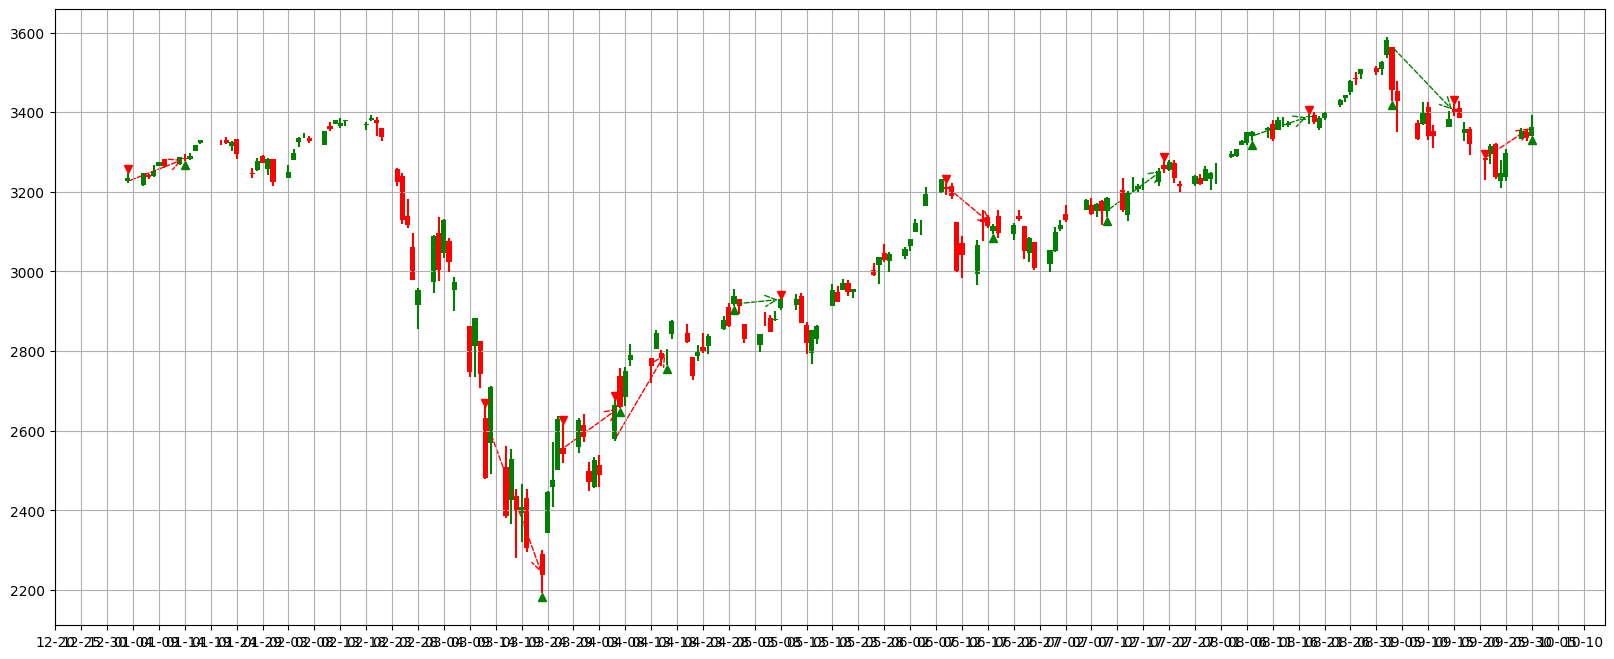

In [29]:
evaluater.draw_profit_plot(profit_table, all_data)

In [30]:
total_profit, profit_table = evaluater.build_profit_table_strategy_2(result_table, all_data, profit_percentage, loss_percentage, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)

total_profit = -133.21302734375013


,in_date,in_price,out_date,out_price,pv,profit,strategy,strategy_price,profitability
0,2020-01-03,3226.36,2020-01-14,3283.15,peak,-56.79,NaN,NaN,-0.0176 %
1,2020-03-27,2555.87,2020-04-07,2659.41,peak,-103.54,NaN,NaN,-0.0405 %
2,2020-03-12,2630.86,2020-03-16,2420.391,peak,210.469,stop_profit,2420.391,0.08 %
3,2020-04-06,2578.28,2020-04-09,2784.542,peak,-206.262,stop_loss,2784.542,-0.08 %
4,2020-04-29,2918.46,2020-05-08,2929.8,valley,11.34,NaN,NaN,0.0039 %
5,2020-06-09,3213.32,2020-06-18,3115.34,peak,97.98,NaN,NaN,0.0305 %
6,2020-07-10,3152.47,2020-07-21,3257.3,valley,104.83,NaN,NaN,0.0333 %
7,2020-08-07,3340.05,2020-08-18,3389.78,valley,49.73,NaN,NaN,0.0149 %
8,2020-09-03,3564.74,2020-09-15,3401.2,valley,-163.54,NaN,NaN,-0.0459 %
9,2020-09-21,3285.57,2020-09-30,3363.0,peak,-77.43,NaN,NaN,-0.0236 %


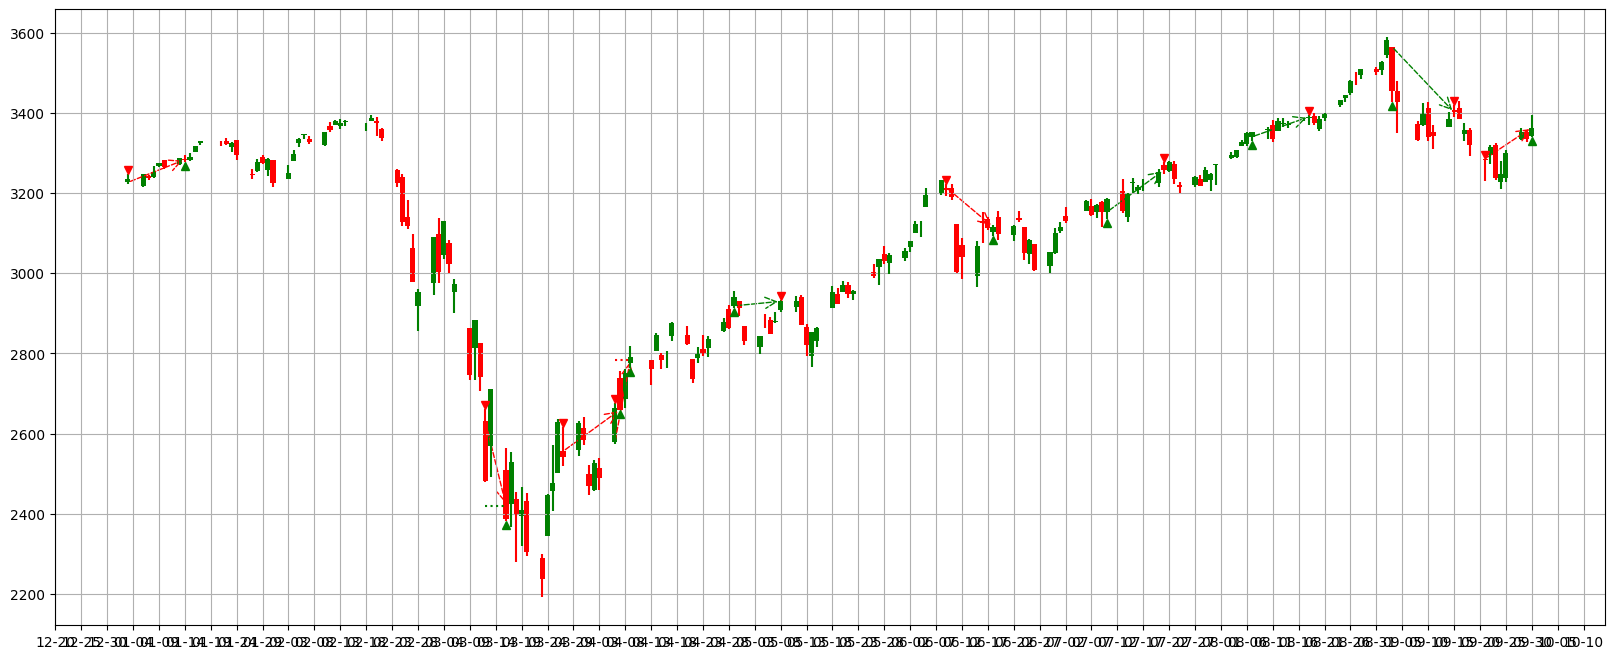

In [31]:
evaluater.draw_profit_plot(profit_table, all_data)

In [32]:
total_profit, profit_table = evaluater.build_profit_table_strategy_3(result_table, all_data, profit_percentage, loss_percentage, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)

total_profit = -249.89883789062515


,in_date,in_price,out_date,out_price,pv,profit,strategy,strategy_price,profitability
0,2020-01-03,3226.36,2020-01-14,3283.15,peak,-56.79,NaN,NaN,-0.0176 %
1,2020-03-27,2555.87,2020-04-07,2659.41,peak,-103.54,NaN,NaN,-0.0405 %
2,2020-03-12,2630.86,2020-03-12,2522.069,peak,108.791,stop_profit,2522.069,0.0414 %
3,2020-04-06,2578.28,2020-04-16,2799.55,peak,-221.27,NaN,NaN,-0.0858 %
4,2020-04-29,2918.46,2020-05-08,2929.8,valley,11.34,NaN,NaN,0.0039 %
5,2020-06-09,3213.32,2020-06-18,3115.34,peak,97.98,NaN,NaN,0.0305 %
6,2020-07-10,3152.47,2020-07-21,3257.3,valley,104.83,NaN,NaN,0.0333 %
7,2020-08-07,3340.05,2020-08-18,3389.78,valley,49.73,NaN,NaN,0.0149 %
8,2020-09-03,3564.74,2020-09-15,3401.2,valley,-163.54,NaN,NaN,-0.0459 %
9,2020-09-21,3285.57,2020-09-30,3363.0,peak,-77.43,NaN,NaN,-0.0236 %


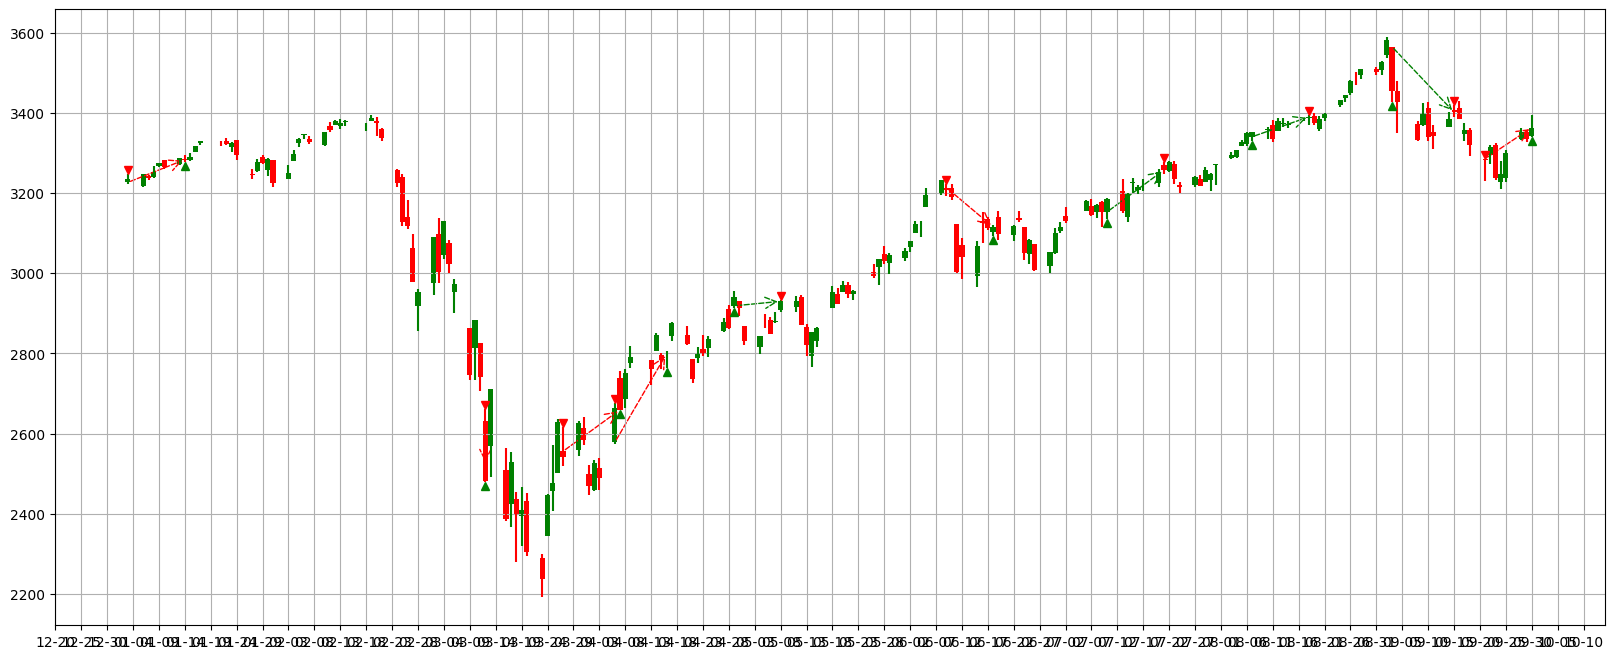

In [33]:
evaluater.draw_profit_plot(profit_table, all_data)

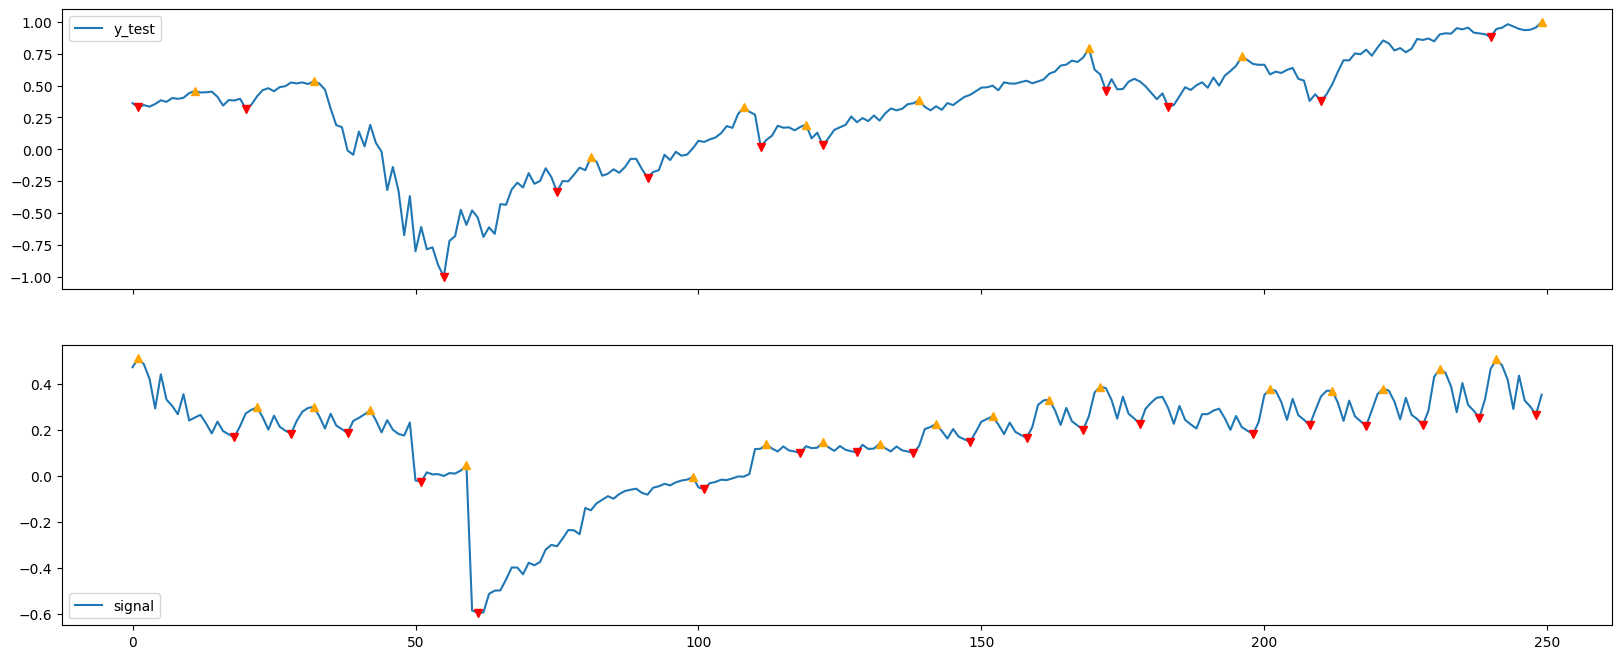

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)
ax[0].plot(y_test[0].flatten(), label='y_test')
ax[1].plot(lstm_processed_signal[0].flatten(), label='signal')
for x , pv in enumerate(pv_test_data[0]):
    if pv == 1:
        ax[0].plot(x, y_test[0].flatten()[x], '^', color='orange')
    elif pv == -1:
        ax[0].plot(x, y_test[0].flatten()[x], 'v', color='red')
for x , pv in enumerate(pv_signal[0]):
    if pv == 1:
        ax[1].plot(x, lstm_processed_signal[0].flatten()[x], '^', color='orange')
    elif pv == -1:
        ax[1].plot(x, lstm_processed_signal[0].flatten()[x], 'v', color='red')
ax[0].legend()
ax[1].legend()
plt.show()

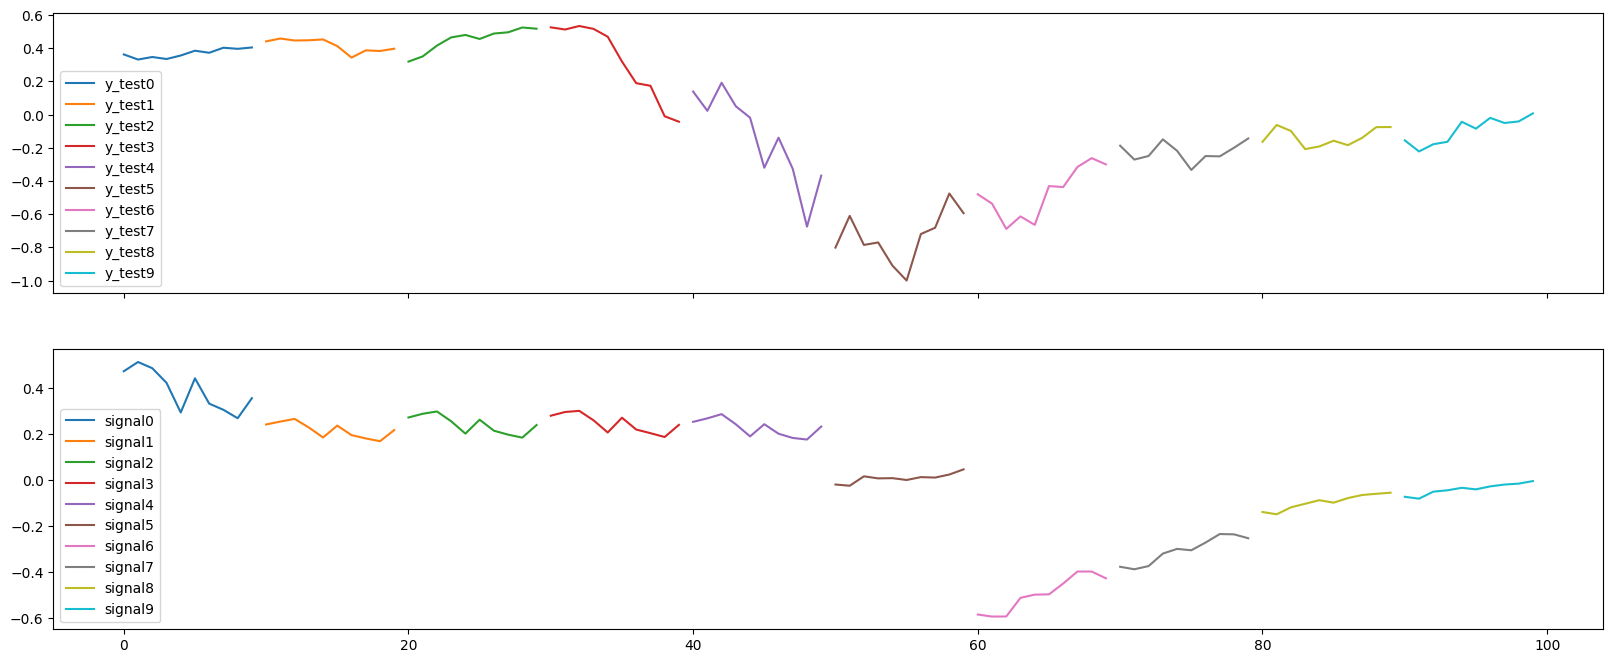

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)
count=0
for i in range(0, 10): 
    countx=range(count, count+10)
    ax[0].plot(countx, y_test[0][i], label=f'y_test{i}')
    ax[1].plot(countx, lstm_processed_signal[0][i], label=f'signal{i}')
    count+=10
ax[0].legend()
ax[1].legend()
plt.show()